<h1>Analysis of the ANZ synthesized dataset<h1>

<h2>Introduction</h2>
<p>This jupyter notebook aims to aquire, preprocess, visualize and clean the ANZ synthesized dataset. The main goal is to provide necessary visuals corresponding to the context of the dataset, lay down some key insights for the same and learn some key data science concepts through the process</p>

<p>We will be going over some steps for the complete exploratory data analysis (EDA) of the dataset</p>
<ol>
    <li>Aquiring the data</li>
    <li>Summary statistics of the bulk data</li>
    <li>EDA and Data Cleaning</li>
    <li>Final keynotes</li>

<h2>Necessary imports for analysis</h2>

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import scipy.stats as ss
import dython
from dython.nominal import associations

<h2>Aquiring the dataset</h2>

In [112]:
df = pd.read_excel('ANZ_data.xlsx',sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, verbose=False, parse_dates=False)

<h2>Summmary statistics of the bulk dataset</h2>

We will first check out the first 5 columns of the dataset to confirm our data got successfully imported

In [113]:
#Checking the first 5 records as verification that the data has successfully been imported
df.head()  

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


<b>Shape of the dataset</b>

In [114]:
df.shape

(12043, 23)

<b>Present columns in the dataset</b>

In [115]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

We see that we have about 12,043 rows of data with about 23 features

<b>Data types of the respective columns</b>

In [116]:
df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

Our data is mostly categorical data. We have some numerical data in the form of `amount, age, balance, merchant_code and card_present_flag`. We also have a datatime columns `date` which can be used for the creation of <b>Time series</b> later on.

<b>Missing values in each column</b>

In [117]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

We see that there is a huge gap of data for the `merchant_code` as well as the `bpay_biller_code`. There are plenty of null values in `merchant_suburb, merchant_state, merchangt_long_lat, merchant_id and card_present_flag`. All the columns having the same number of null values may suggest that these trasactions weren't made with merchants or that a certain merchant lacks all these feature values.

<b>Brief Summary statistics of the data</b>

In [118]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


The `merchant_code` column isn't as useful for us, as we only have null and 0s present in that particular column.

Some of the key insights drawn from this table
<ol>
    <li>The average age of a party in transaction is about <b>30 years</b></li>
    <li>The average transaction about is about <b>187 AUD</b></li>
    <li>The average balance is about <b>14,704 AUD</b></li>
    </ol>
    
Some other notable observations
<ul>
    <li>The maximum age of transaction has been <b>78 years</b> while the minimum has been <b>18 years</b> which falls under the standard guidelines as only adults should be allowed to partake in such transactions</li>
    <li>The minimum transaction has been done for about 0.1 AUD while the maximum has been of 8835 AUD. This signifies that there is a <b>large leeway with regards to transactions performed and the amount exchanged</b>
    

<h3>Heatmap of the numerical values</h3>

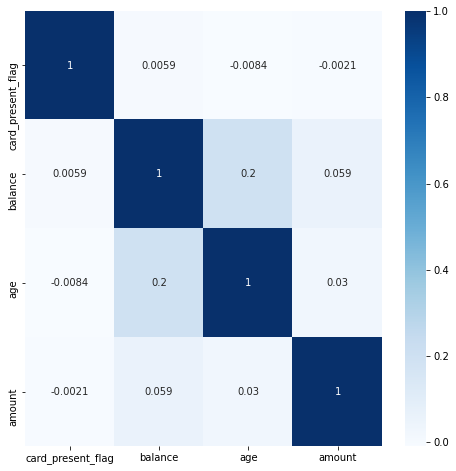

In [119]:
plt.figure(figsize=(8,8))
hm = sns.heatmap(df[['card_present_flag','balance','age','amount']].corr(),annot=True,cmap='Blues')

We see that there is not much correlation present between any of the numerical values currently. The main correlation is between age and balance. This correlation is observable in real-life as well as <b>usually older people have a higher balance</b>

There is not much correlation present between any of the numerical columns with regards to the `amount` column. Converting some categorical variables into numerical values may provide better insights

<h3>Unique values for each column</h3>

In [120]:
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

<b>Analysis of the unique values</b>

<ul>
    <li>As we see that <b>country, currency, merchant_code</b> have only 1 value (as the dataset is from Australia), we will proceed to ignore them for future heatmap correlation matrix.</li>
    <li>The transaction ID <b>is unique for each record in the dataset</b>. We can ignore it for correlation.
    <li>There are about <b>5,726</b> unique merchants listed in the dataset.</li>
    <li>The transactions are only performed in <b>debit or credit</b>.</li>
    <li>There are about <b>100 unique customers</b> listed in the dataset</li>
    <li>Transactions have been recorded for <b>9</b> states</li>
</ul>

<h3><b>Complete correlation heatmap between relevant numerical features of the dataset</b></h3>

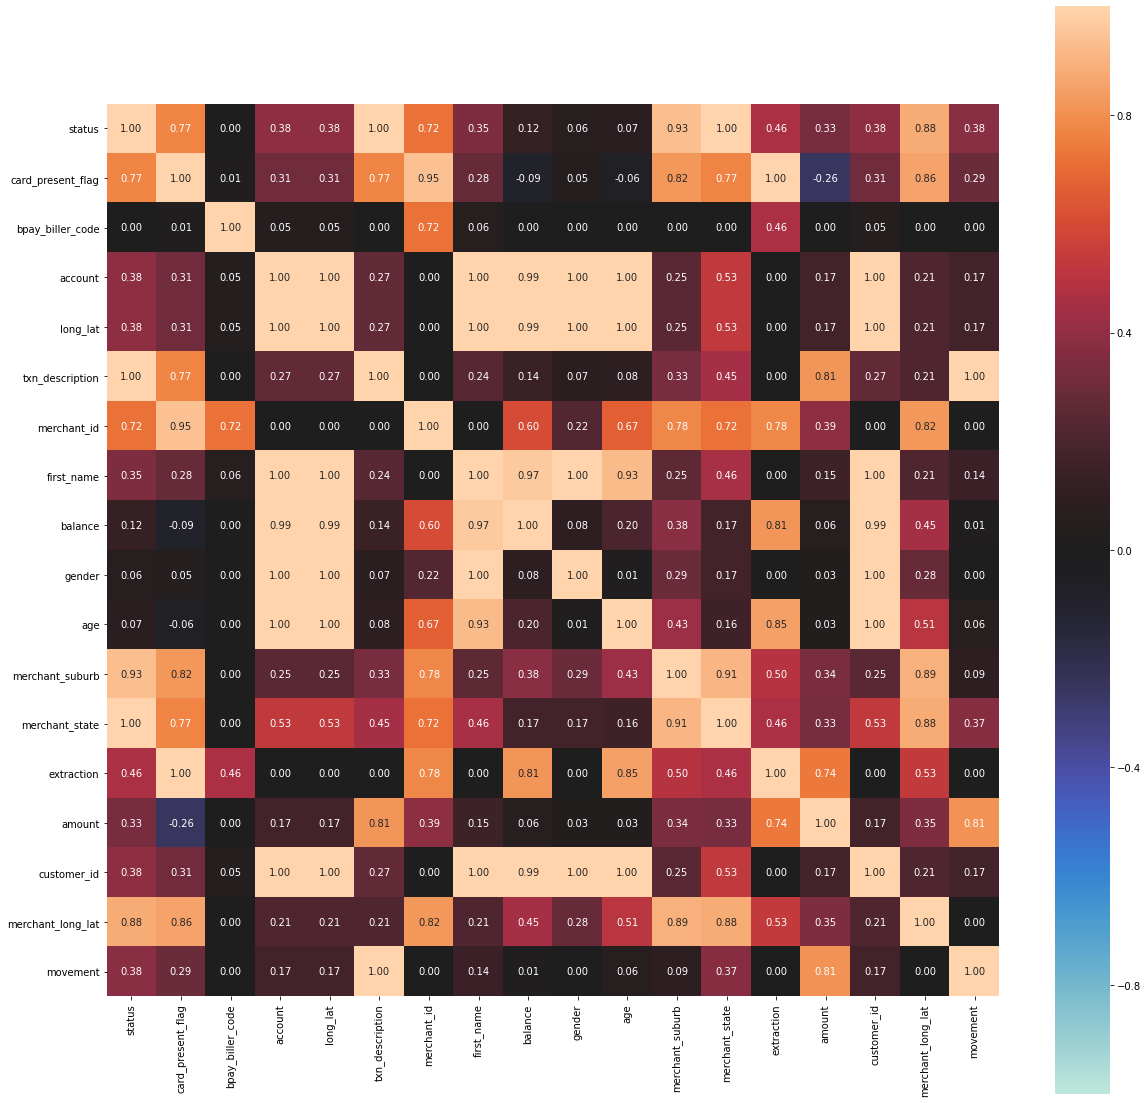

{'corr':                      status  card_present_flag  bpay_biller_code   account  \
 status             1.000000           0.770484          0.000000  0.383121   
 card_present_flag  0.770484           1.000000          0.012524  0.311925   
 bpay_biller_code   0.000000           0.012524          1.000000  0.046736   
 account            0.383121           0.311925          0.046736  1.000000   
 long_lat           0.383121           0.311925          0.046736  1.000000   
 txn_description    0.999834           0.770499          0.000000  0.266220   
 merchant_id        0.724309           0.945228          0.724340  0.000000   
 first_name         0.345659           0.281359          0.062011  0.999164   
 balance            0.120117          -0.090053          0.004681  0.993991   
 gender             0.058843           0.046738          0.000000  0.995922   
 age                0.070495          -0.058345          0.002373  1.000000   
 merchant_suburb    0.930836           0.822

In [121]:
cols = [col for col in df.columns if col not in ['date', 'merchant_code','currency','country','transaction_id']]
associations(df[cols],figsize=(20,20))

There is high correlation of `amount` with `extraction`, `movement`, `txn_description`. It is noticeable that transactions made with a certain `movement` label have much higher values than the other (transactions made with credit are far more expensive) which reflects in real life as well.

Weak correlation of `customer_id` with `merchant_id`, `merchant_suburb` and `merchant_state` implies a lack of <b>CUSTOMER LOYALTY</b> as the customer keeps changing its merchants for transactions.

There is also some correlation of `amount` with the `merchant_state` and `merchant_suburb` implying that <b>more affluent areas will undergo higher value transactions which would in-turn reflect a higher amount in the dataset</b>

There is also correlation of `amount` with `status` and the `merchant_id` implying that <b>some merchants undergo higher amount transactions than the others</b>

<b>Some examples of other high correlations that may be noteworthy include</b>
<ul>
    <li>High correlation among merchant_state, merchant_suburb and status, card_present_flag implies that some merchants in some areas undergo <b> more authorized and relevant transactions than the others</b></li>
    <li>High correlation between merchant_id and merchant_suburb implies that <b>merchants rarely change locations and operate from the same sectors at all times</b></li>
    <li>There is positive correlation between amount and movement as well, implying that <b>there is a relation between the amount of money exchanged in the transactions and the type of payment method used - debit or credit</b></li>
    <li>customer_id does not have a very high correlated value with merchant_state or merchant_suburb implying that there is <b>Not much customer loyalty</b></li>.
</ul>

<h2>Exploratory Data Analysis (EDA)</h2>

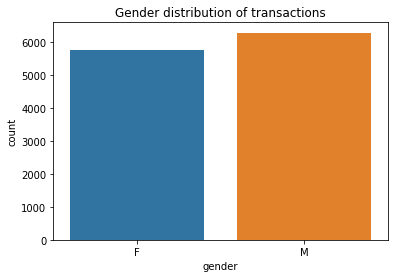

In [122]:
m = sns.countplot(df['gender'])
plt.title('Gender distribution of transactions')
plt.show()

We see that the dataset is not skewed in terms of gender distribution of the customers. The transactions are fairly equally distributed among both gender.

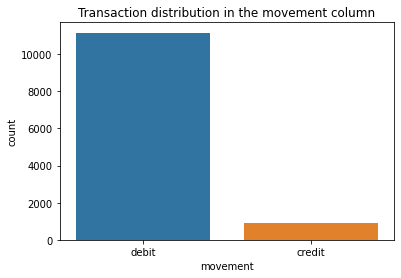

In [123]:
sns.countplot(df['movement'])
plt.title('Transaction distribution in the movement column')
plt.show()

We can see that there is a bulk of debit transactions while credit transactions make up only for a small amount of the total transactions done. This is reflective in our dataset of the <b>correlation between movement and amount</b>.

In [1]:
sns.countplot(x='gender',hue='movement',data=df)
plt.title('Type of transaction made by each gender')
plt.show()

NameError: name 'sns' is not defined

Both the genders have a similar ratio for the number of debit and credit transactions performed. We can proceed normally

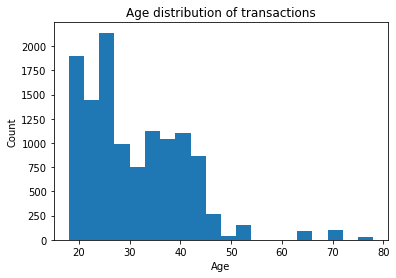

In [125]:
plt.hist(df['age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution of transactions')
plt.show()

We see that the majority of transactions are made between the ages of 18-25 thus targetting a younger audience. The histogram declines going towards the older section of customers. There are a few outlier values of very aged people being involved in the transactions.

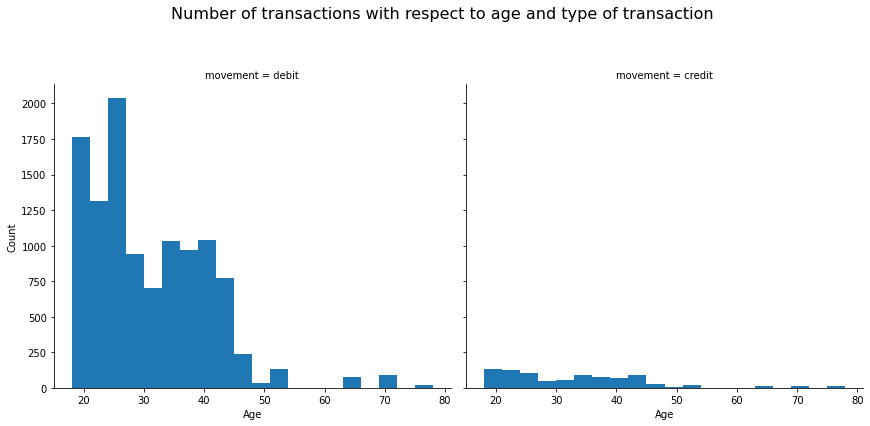

In [126]:
s = sns.FacetGrid(df,col='movement',size=6)
s.map(plt.hist,'age',bins=20).set_axis_labels('Age','Count')
s.fig.subplots_adjust(top=0.8)
s.fig.suptitle('Number of transactions with respect to age and type of transaction', fontsize=16)
plt.show()

We see a similar trend for different types of transactions. The credit histogram doesn't suffer from a steep slope implying the fact that <b>usually the older people are engaged in credit-related transactions</b>.

<h3>Cleaning the merchant_state column</h3>

As we are have missing values in the `merchant_state` column (4326 values), we can mark those values as unknown implying we do not know where the transaction was made or it was made in an area not listed in the columns. We do this for further convenience while plotting and grouping data

In [127]:
df['merchant_state'] = df['merchant_state'].fillna('unknown')

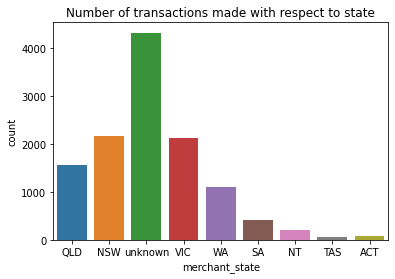

In [128]:
m = sns.countplot(df.merchant_state)
plt.title('Number of transactions made with respect to state')
plt.show()

We see that the most transactions made are in the `unknown` regions, which is about double the value of the second in place i.e. `NSW` and `VIC` states

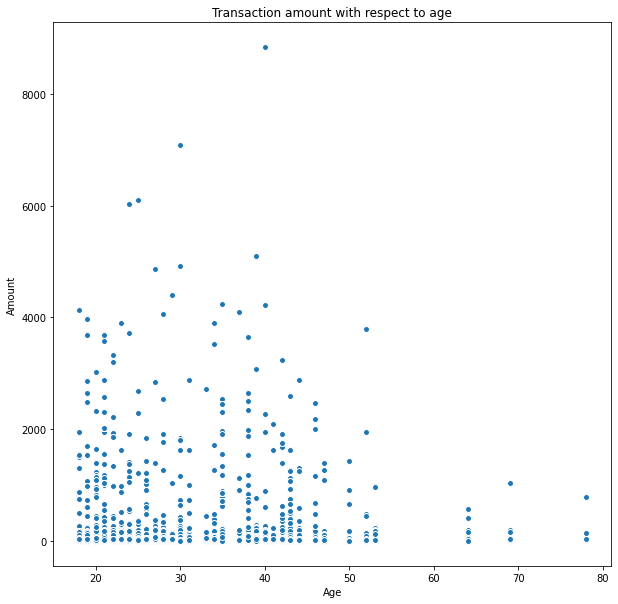

In [129]:
plt.figure(figsize=(10,10))
n = plt.scatter(df['age'],df['amount'],edgecolor='w')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Transaction amount with respect to age')
plt.show()

We see that age is not correlated with the transaction amount. There are a few outliers but the majority of values are concentrated in the <b>0-1000</b> value

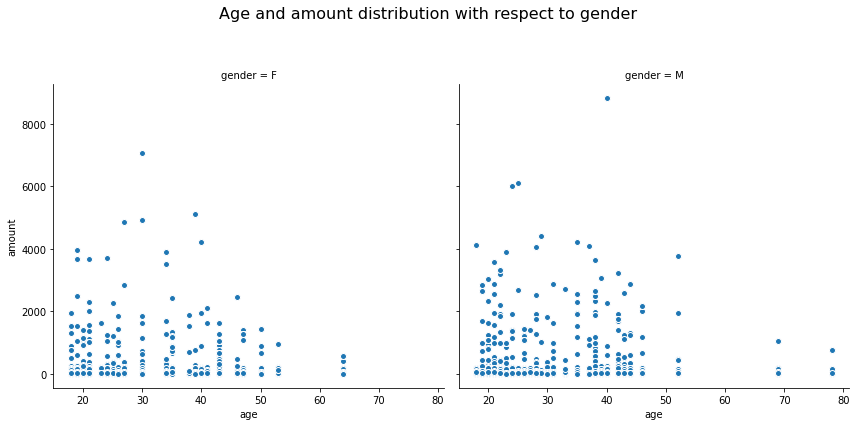

In [130]:
s = sns.FacetGrid(df,size=6,col='gender')
s.map(plt.scatter,'age','amount',edgecolor='w')
s.fig.subplots_adjust(top=0.8)
s.fig.suptitle('Age and amount distribution with respect to gender', fontsize=16)
plt.show()

We note a few important observations for the graph
<ul>
    <li>The transaction amount is more concentrated for the female group</li>
    <li>There are more older males engaged in the transactions than females</li>
    <li>There are many more outliers in the male group, the highest transaction belonging to the group</li>

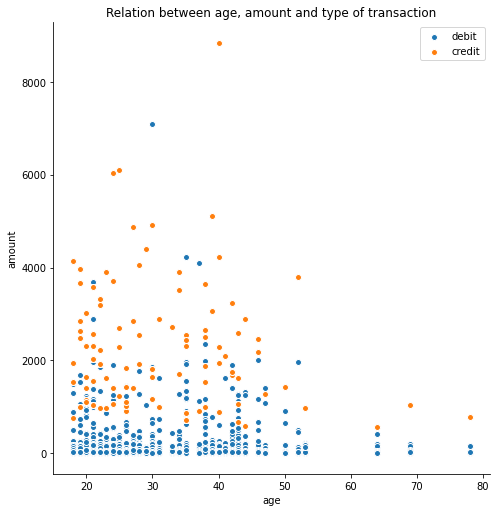

In [131]:
s = sns.FacetGrid(df,size=7,hue='movement')
s.map(plt.scatter,'age','amount',edgecolor='w')
plt.title('Relation between age, amount and type of transaction')
plt.legend()
plt.show()

We note that the higher amount transactions are from credit transactions, which implies a correlation between the amount and the type of transaction <b>(as we noted in the heatmap correlation matrix)</b>. The number of credit transactions are spread out but are still much prevalent as we move towards the older ages (reflects the real life circumstances of older people engaging in credit transactions).

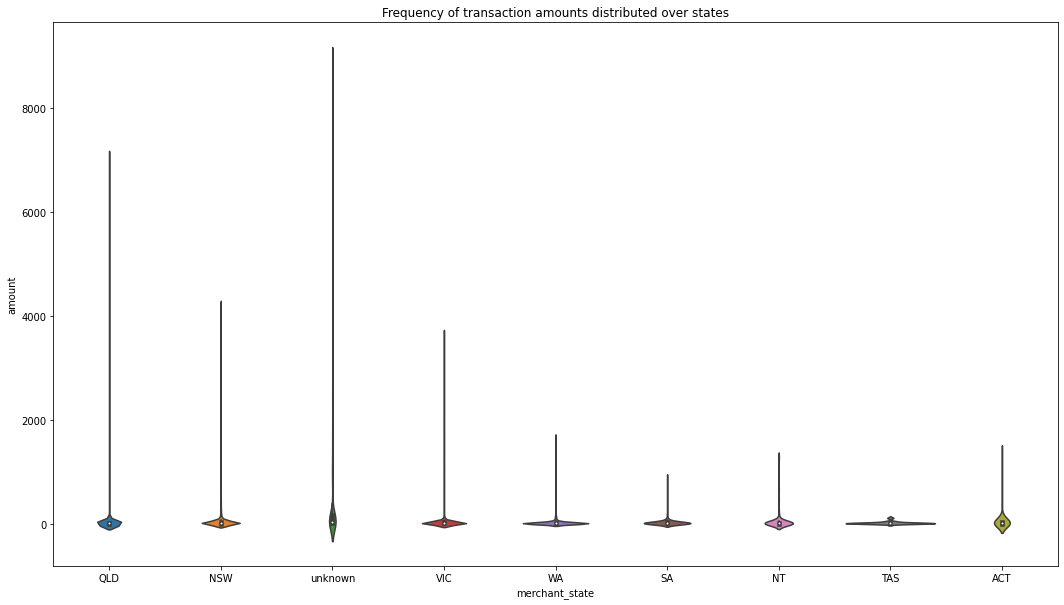

In [132]:
plt.figure(figsize=(18,10))
v = sns.violinplot(x='merchant_state',y='amount',data=df)
plt.title("Frequency of transaction amounts distributed over states")
plt.show()

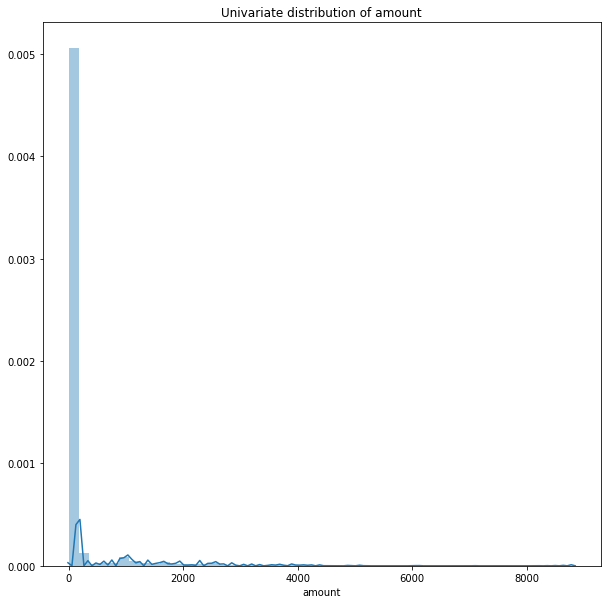

In [133]:
plt.figure(figsize=(10,10))
t = sns.distplot(df['amount'])
plt.title('Univariate distribution of amount')
plt.show()

We see that the data is extremely skewed to the right. This will prove to be <b>very obstructive while making predictions or understanding the outliers better</b>. We can fix this skewness by taking the logarithm of the amount column.

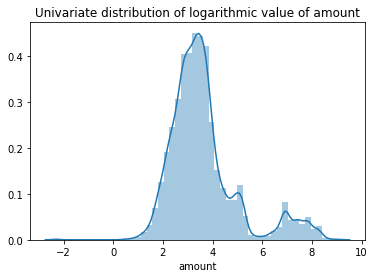

In [134]:
sns.distplot(np.log(df['amount']))
plt.title('Univariate distribution of logarithmic value of amount')
plt.show()

We can now notice <b>a bell shaped curve, which resembles a standard distribution</b>. We notice that there are some outliers towards the right of the dataset which we would have to fix while performing <b>regression analysis or predictions</b>

<h2>Finding outliers in relevant numerical columns</h2>

In [135]:
df[~(np.abs(df.age-df.age.mean()) <= (3*df.age.std()))]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
39,authorized,1.0,NaN,ACC-721712940,AUD,145.09 -37.82,POS,9ba904d4-5b0e-403c-b1bc-71e6a2bcdc0f,NaN,Andrew,...,78,Preston,VIC,2018-08-01T09:59:35.000+0000,25.70,431119a28af748cbb12920804a7fcda3,Australia,CUS-1646183815,145.03 -37.74,debit
98,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,...,69,NaN,unknown,2018-08-01T17:00:00.000+0000,1043.12,360a8968ef944c9e91ee1f72a9759aec,Australia,CUS-1388323263,NaN,credit
184,authorized,1.0,NaN,ACC-721712940,AUD,145.09 -37.82,POS,3a5629b1-d175-4133-b944-2c178bd78f69,NaN,Andrew,...,78,East Melbourne,VIC,2018-08-02T10:12:40.000+0000,12.37,4a820c04e7ae4136a8e2779a2a41eff6,Australia,CUS-1646183815,144.97 -37.81,debit
185,authorized,1.0,NaN,ACC-559365433,AUD,147.31 -42.88,SALES-POS,092cf080-71f6-45f7-a423-23fb0fdc91d7,NaN,Mary,...,64,Mount Beauty,VIC,2018-08-02T10:29:20.000+0000,31.50,40e386bdc36a45e984537e154039f5af,Australia,CUS-1654129794,147.17 -36.74,debit
199,posted,NaN,0,ACC-721712940,AUD,145.09 -37.82,PAY/SALARY,NaN,0.0,Andrew,...,78,NaN,unknown,2018-08-02T12:00:00.000+0000,782.42,087234ecb6994edbb66d56965387b885,Australia,CUS-1646183815,NaN,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11738,authorized,0.0,NaN,ACC-559365433,AUD,147.31 -42.88,SALES-POS,28306da3-da51-41c7-9a73-91ec2255a4b7,NaN,Mary,...,64,Melbourne,VIC,2018-10-29T10:26:39.000+0000,7.24,6584cb1aced5491aa5933c42d2cd4533,Australia,CUS-1654129794,144.96 -37.82,debit
11791,posted,NaN,NaN,ACC-2920611728,AUD,144.96 -37.76,PAYMENT,NaN,NaN,Tyler,...,69,NaN,unknown,2018-10-29T20:00:00.000+0000,64.00,ab22022bdc484b48814d1e2ec360f484,Australia,CUS-1388323263,NaN,debit
11813,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,fb65ded2-f680-474b-a46b-86cb75bc2125,NaN,Tyler,...,69,Doncaster,VIC,2018-10-30T01:11:14.000+0000,56.06,5eb8e60b883542a8b584e10e33b64cc0,Australia,CUS-1388323263,145.12 -37.78,debit
12001,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,...,69,NaN,unknown,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit


In [136]:
df[(np.abs(df.amount-df.amount.mean()) > (3*df.amount.std()))]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,unknown,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
90,posted,NaN,0,ACC-3485804958,AUD,138.52 -35.01,PAY/SALARY,NaN,0.0,Jessica,...,34,NaN,unknown,2018-08-01T16:00:00.000+0000,3903.73,cf378669537f46e4acee7321fa8accb1,Australia,CUS-1196156254,NaN,credit
93,posted,NaN,0,ACC-4059612845,AUD,130.98 -12.49,PAY/SALARY,NaN,0.0,Jonathan,...,38,NaN,unknown,2018-08-01T16:00:00.000+0000,2647.38,794ef124f66645e68d0707ef0a544b50,Australia,CUS-495599312,NaN,credit
101,posted,NaN,0,ACC-1349834573,AUD,145.17 -37.84,PAY/SALARY,NaN,0.0,Matthew,...,39,NaN,unknown,2018-08-01T17:00:00.000+0000,3071.14,8c993ac0426d4f66a0b6322b4e56507c,Australia,CUS-1790886359,NaN,credit
206,posted,NaN,0,ACC-2107684084,AUD,145.03 -37.88,PAY/SALARY,NaN,0.0,Richard,...,22,NaN,unknown,2018-08-02T13:00:00.000+0000,2218.73,f9fad2f5968d4d4398a23a5ac4410ec9,Australia,CUS-2283904812,NaN,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,posted,NaN,0,ACC-2231965366,AUD,144.96 -37.84,PAY/SALARY,NaN,0.0,Linda,...,35,NaN,unknown,2018-10-30T12:00:00.000+0000,2443.24,4309773d67504bfea42c1ea61027d8af,Australia,CUS-2155701614,NaN,credit
11881,posted,NaN,0,ACC-958000567,AUD,130.90 -12.37,PAY/SALARY,NaN,0.0,Sandra,...,34,NaN,unknown,2018-10-30T17:00:00.000+0000,3517.61,259d50b522a64b6f82cc898198b290ff,Australia,CUS-4142663097,NaN,credit
11960,posted,NaN,0,ACC-3084464802,AUD,145.15 -37.76,PAY/SALARY,NaN,0.0,Susan,...,19,NaN,unknown,2018-10-31T12:00:00.000+0000,2485.37,a028a7a91b664a6baffad7668a3f3eeb,Australia,CUS-1928710999,NaN,credit
11970,posted,NaN,0,ACC-1516130869,AUD,130.84 -12.45,PAY/SALARY,NaN,0.0,Jessica,...,21,NaN,unknown,2018-10-31T13:00:00.000+0000,2306.63,8d243f88cede47a48d7ebcd3e3e97f57,Australia,CUS-325142416,NaN,credit


<h2>Understanding the distribution of amount</h2>

This section will deal with understanding how the amount is distributed among various factors, which factors are most responsible for the total as well as plot a time-series graph depicting the sum value over time.

<b>Mean value of transactions with respect to different customer IDs</b>

In [137]:
s = df.groupby('customer_id')
s['amount'].mean().sort_values()

customer_id
CUS-2487424745     45.348772
CUS-1614226872     74.465019
CUS-860700529      77.681888
CUS-2142601169     78.206106
CUS-3378712515     87.546000
                     ...    
CUS-3174332735    489.220980
CUS-55310383      497.669474
CUS-1816693151    515.583846
CUS-2738291516    567.614500
CUS-495599312     693.632903
Name: amount, Length: 100, dtype: float64

<b>Total number of transactions with respect to different customer IDs</b>

In [138]:
s['amount'].count().sort_values()

customer_id
CUS-1739931018     25
CUS-495599312      31
CUS-1646183815     34
CUS-3201519139     37
CUS-3395687666     40
                 ... 
CUS-1614226872    259
CUS-3378712515    260
CUS-3026014945    292
CUS-2142601169    303
CUS-2487424745    578
Name: amount, Length: 100, dtype: int64

<b>Mean Amount with respect to customer names</b>

In [139]:
p = df.groupby('first_name')
p['amount'].mean().sort_values()

first_name
Diana        45.348772
Rhonda       74.465019
Jeffrey      86.760928
Tonya        99.569658
Edward       99.601529
               ...    
Brian       448.658413
Cindy       489.220980
Melissa     497.669474
Tim         515.583846
Jonathan    693.632903
Name: amount, Length: 80, dtype: float64

<b>Total transactions with respect to customer names</b>

In [140]:
p['amount'].count().sort_values()

first_name
Jonathan      31
Andrew        34
David         40
Elizabeth     44
Cindy         51
            ... 
Jeffrey      388
Joseph       391
Jessica      408
Diana        578
Michael      746
Name: amount, Length: 80, dtype: int64

<b>Maximum transaction with respect to customer names</b>

In [141]:
p['amount'].max().sort_values()

first_name
Mary          576.00
Debra         761.33
Andrew        782.42
Rhonda        892.09
Karen         920.71
              ...   
Christine    5103.51
Richard      6024.49
Ronald       6107.23
Michele      7081.09
Tim          8835.98
Name: amount, Length: 80, dtype: float64

<b>Observations recorded</b>
<ul>
    <li>The customer with the highest number of transactions is <b>Michael</b></li>
    <li><b>Michael</b> as well as other customers with the highest number of transactions such as <b>Jessica, Jeffrey etc.</b> do not have customer IDs</li>
    <li>The customers with the least amount of transactions do not have their names recorded in the first_name column</li>
    <li>The number of transactions per customer w.r.t. customer name varies from <b>31 to 746</b></li>
    <li>The number of transactions per customer w.r.t customer ID varies from <b>25 to 578</b></li>
<ul>
    
<b><h4>Therefore we can conclude that the range of transactions per customers varies from 25 to 746 AUD</h4></b>
<b><h4>Similarily we conclude that the average transaction per customer goes from 45.348772 to 693.632903</h4></b>

<b>Average transaction with respect to state</b>

In [142]:
q = df.groupby('merchant_state')
p1=q['amount'].mean().sort_values()
p1

merchant_state
TAS         28.866618
WA          30.901873
QLD         34.372397
SA          40.425470
VIC         41.099953
NT          44.726293
NSW         47.036316
ACT         66.803836
unknown    451.552901
Name: amount, dtype: float64

<b>Total transaction amount with respect to state</b>

In [143]:
q['amount'].sum().sort_values()

merchant_state
TAS           1962.93
ACT           4876.68
NT            9168.89
SA           16776.57
WA           33992.06
QLD          53483.45
VIC          87584.00
NSW         102021.77
unknown    1953417.85
Name: amount, dtype: float64

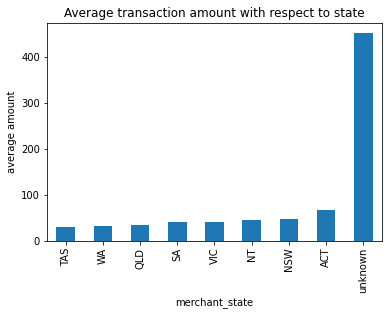

In [144]:
q['amount'].mean().sort_values().plot(kind='bar')
plt.ylabel('average amount')
plt.title('Average transaction amount with respect to state')
plt.show()

We see that the average transaction amount is much higher for the places unknown to us. The second state with the highest amount of average transaction is `ACT` and the others follow quite closely.

<b>Average amount with respect to type of transaction (movement)</b>

In [145]:
t = df.groupby('movement')
t['amount'].mean()

movement
credit    1898.728029
debit       52.572343
Name: amount, dtype: float64

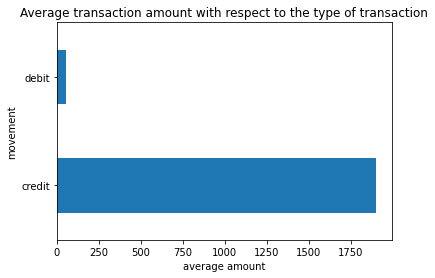

In [146]:
t['amount'].mean().plot(kind='barh')
plt.xlabel('average amount')
plt.title('Average transaction amount with respect to the type of transaction')
plt.show()

We observe that the average credit transaction is much higher than the average debit transaction.

<b>Total Transaction amount</b>

In [147]:
df['amount'].sum()

2263284.2

<b>Total transaction amount through credit and debit</b>

In [148]:
df[df['movement']=='debit'].amount.sum()

586707.35

In [149]:
df[df['movement']=='credit'].amount.sum()

1676576.85

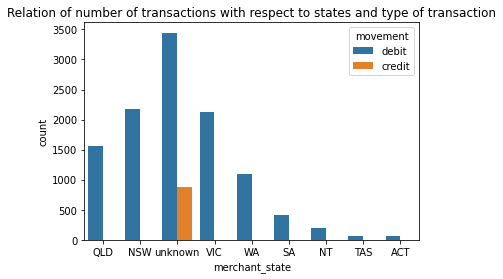

In [150]:
m = sns.countplot(x='merchant_state',data=df,hue='movement')
plt.title('Relation of number of transactions with respect to states and type of transaction')
plt.show()

We see that except the unknown region, no other region has any form of `credit` transactions. Credit transactions are the highest value transactions as they contribute very highly to the final amount value.

<b>It implies that we should focus on growth in the unknown sectors as they contribute very highly towards the final sum amount</b>

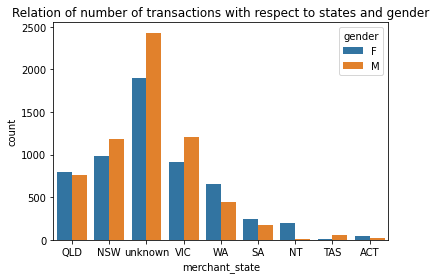

In [151]:
m = sns.countplot(x='merchant_state',hue='gender',data=df)
plt.title('Relation of number of transactions with respect to states and gender')
plt.show()

<b>Relation between transaction amount and txn_description</b>

In [152]:
p = df.groupby('txn_description')

In [153]:
p.amount.sum()

txn_description
INTER BANK      64331.00
PAY/SALARY    1676576.85
PAYMENT        201794.00
PHONE BANK      10716.00
POS            152861.24
SALES-POS      157005.11
Name: amount, dtype: float64

In [154]:
p.amount.mean()

txn_description
INTER BANK      86.699461
PAY/SALARY    1898.728029
PAYMENT         77.613077
PHONE BANK     106.099010
POS             40.407412
SALES-POS       39.909789
Name: amount, dtype: float64

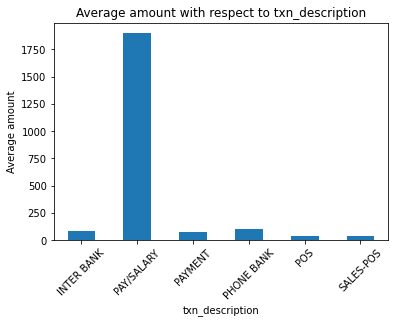

In [155]:
p.amount.mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Average amount')
plt.title('Average amount with respect to txn_description')
plt.show()

We see that the highest amount contribution comes from `PAY/SALARY` while all others have values close to each other.

<h2>Time series plots</h2>

<Figure size 1440x720 with 0 Axes>

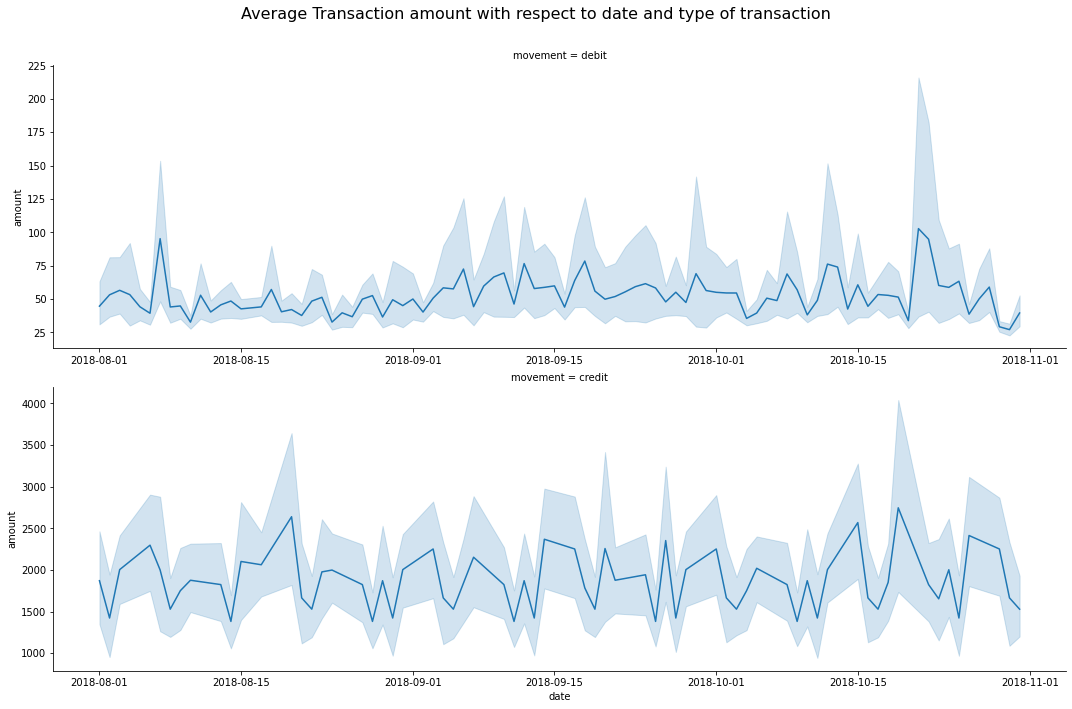

In [156]:
plt.figure(figsize=(20,10))
s = sns.FacetGrid(df,row='movement',sharex=False,sharey=False,height=5,aspect=3)
s.map(sns.lineplot,'date','amount')
s.fig.subplots_adjust(top=0.9)
s.fig.suptitle('Average Transaction amount with respect to date and type of transaction', fontsize=16)
plt.show()

The main observation is that the credit and debit transactions <b>usually spike in number</b> at the same time.
<b>The blue line</b> represents the average transaction value over time. 

Credit transactions are <b>much more eratic and spontaneous compared to debit transactions</b>

The debit transaction amount <b>seem to increase towards the middle of the month and then decrease with a few spikes and here and there</b>
The graph does not signify any significant trend of the credit and debit transactions.

<h2>Decomposing the data-set time series into days, months and years</h2>

In [157]:
df_time = df[['date','amount','movement','txn_description']]

In [158]:
df_time['day'] = df_time['date'].dt.day
df_time['month'] = df_time['date'].dt.month
df_time['year'] = df_time['date'].dt.year

In [159]:
df_time[df_time['movement']=='credit'].amount.max()

8835.98

In [160]:
df_time[(df_time['month']==8) & (df_time['day']==20)]

,date,amount,movement,txn_description,day,month,year
2349,2018-08-20,11.12,debit,POS,20,8,2018
2350,2018-08-20,9.12,debit,SALES-POS,20,8,2018
2351,2018-08-20,8.34,debit,SALES-POS,20,8,2018
2352,2018-08-20,39.62,debit,SALES-POS,20,8,2018
2353,2018-08-20,40.16,debit,SALES-POS,20,8,2018
...,...,...,...,...,...,...,...
2441,2018-08-20,77.76,debit,POS,20,8,2018
2442,2018-08-20,21.60,debit,POS,20,8,2018
2443,2018-08-20,61.00,debit,PAYMENT,20,8,2018
2444,2018-08-20,20.96,debit,POS,20,8,2018


We successfully managed to extract the day, month and year of the transactions and now we can display separate graphs for each month

<h3>Relation between transaction amount and month</h3>

In [161]:
df_time.groupby('month').sum().amount

month
8     729935.52
9     730550.21
10    802798.47
Name: amount, dtype: float64

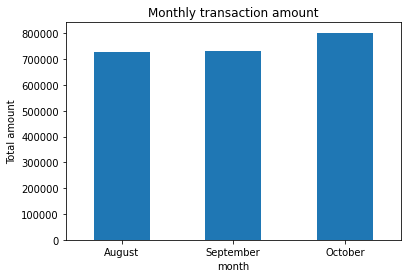

In [162]:
p = df_time.groupby('month').sum().amount.plot(kind='bar')
p.set_xticklabels(['August','September','October'])
plt.xticks(rotation=0)
plt.ylabel('Total amount')
plt.title('Monthly transaction amount')
plt.show()

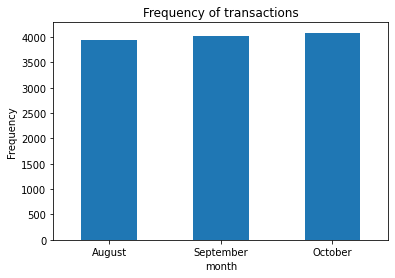

In [163]:
p = df_time.groupby('month').count().amount.plot(kind='bar')
p.set_xticklabels(['August','September','October'])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title('Frequency of transactions')
plt.show()

We notice that the <b>transactions have been ramping up monthly. The transaction costs increased by 0.08% going from August to September and by 9.89% going from September to October.</b>

<b>Average Daily transactions made per month with confidence intervals</b>

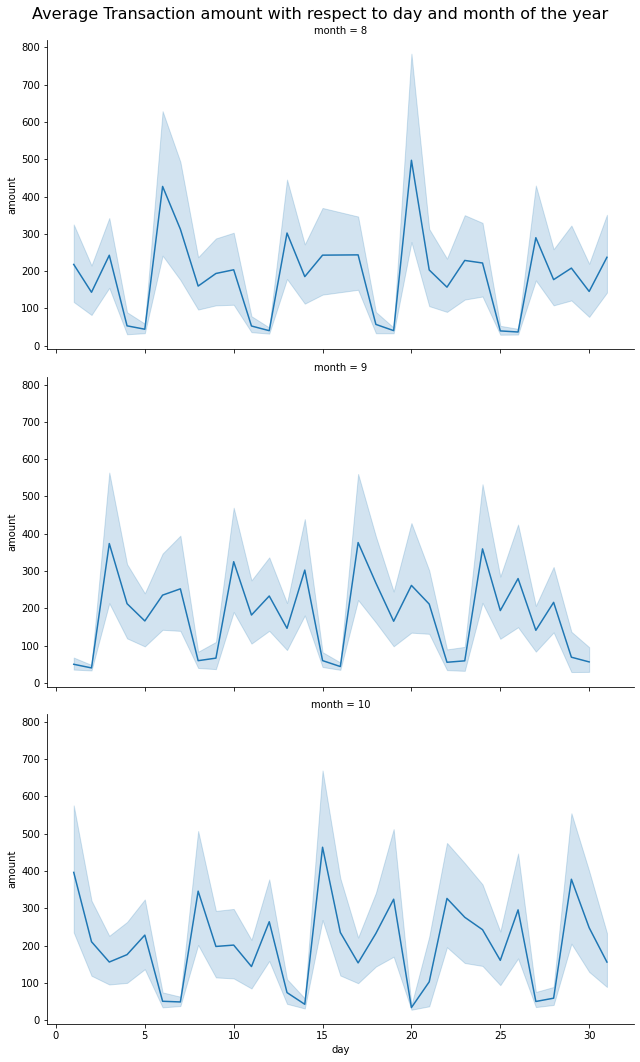

In [164]:
s = sns.FacetGrid(df_time,row='month',height=5,aspect=1.8)
s.map(sns.lineplot,'day','amount')
s.fig.subplots_adjust(top=0.95)
s.fig.suptitle('Average Transaction amount with respect to day and month of the year', fontsize=16)
plt.show()

We notice that there are similar trends throughout each month with regular upward and downward spikes. The plot tends to go downwards while approaching the end of the month.

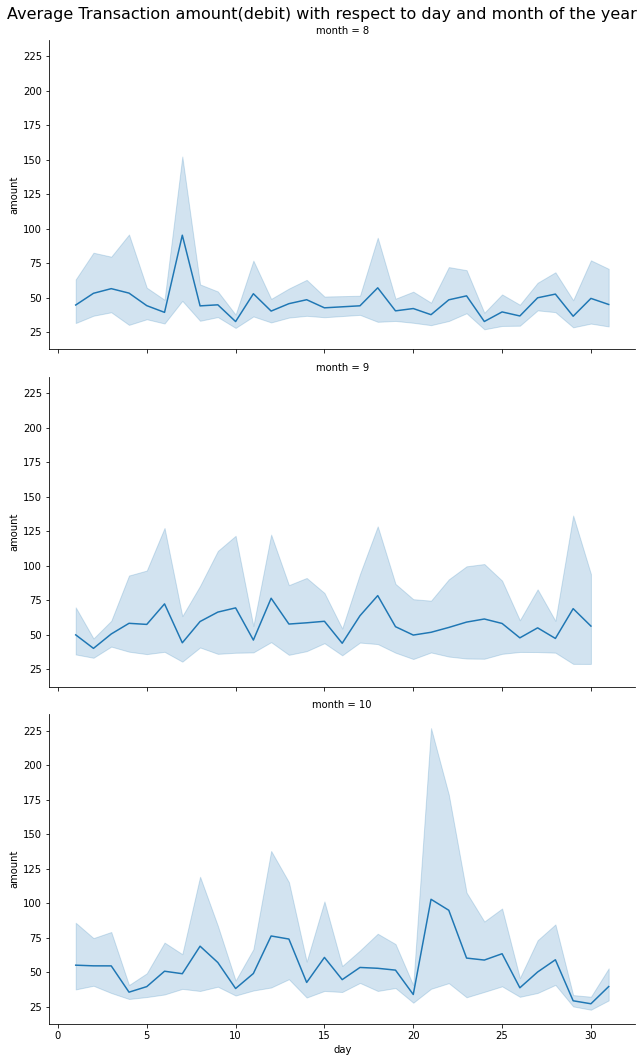

In [165]:
s = sns.FacetGrid(df_time[df_time['movement']=='debit'],row='month',height=5,aspect=1.8)
s.map(sns.lineplot,'day','amount')
s.fig.subplots_adjust(top=0.95)
s.fig.suptitle('Average Transaction amount(debit) with respect to day and month of the year', fontsize=16)
plt.show()

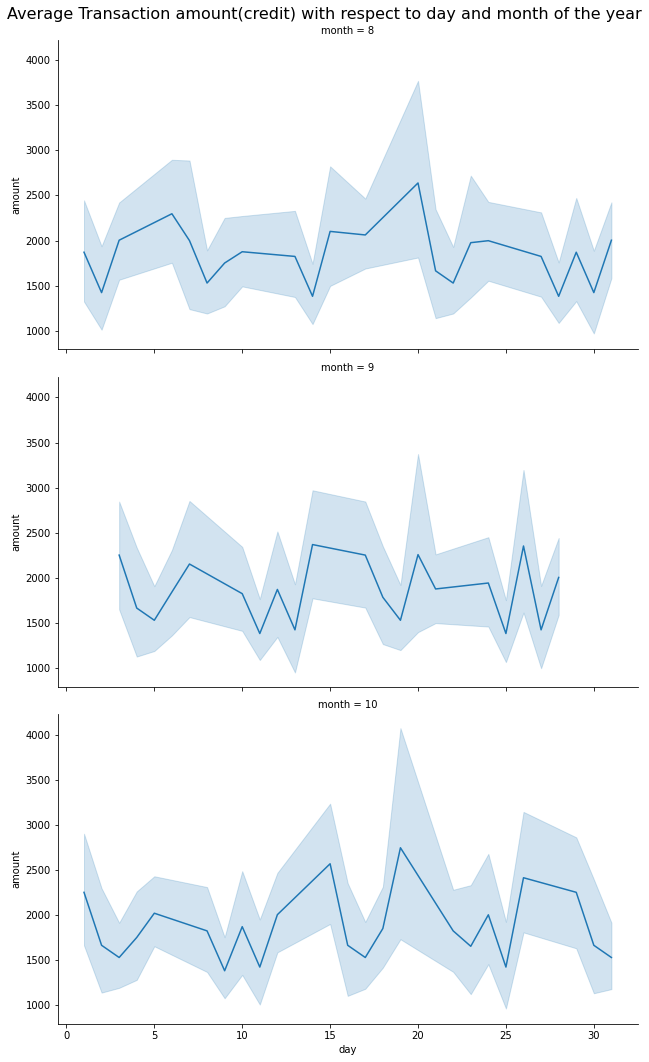

In [166]:
s = sns.FacetGrid(df_time[df_time['movement']=='credit'],row='month',height=5,aspect=1.8)
s.map(sns.lineplot,'day','amount')
s.fig.subplots_adjust(top=0.95)
s.fig.suptitle('Average Transaction amount(credit) with respect to day and month of the year', fontsize=16)
plt.show()

<b>Average transactions throughtout each month with respect to txn_description</b>

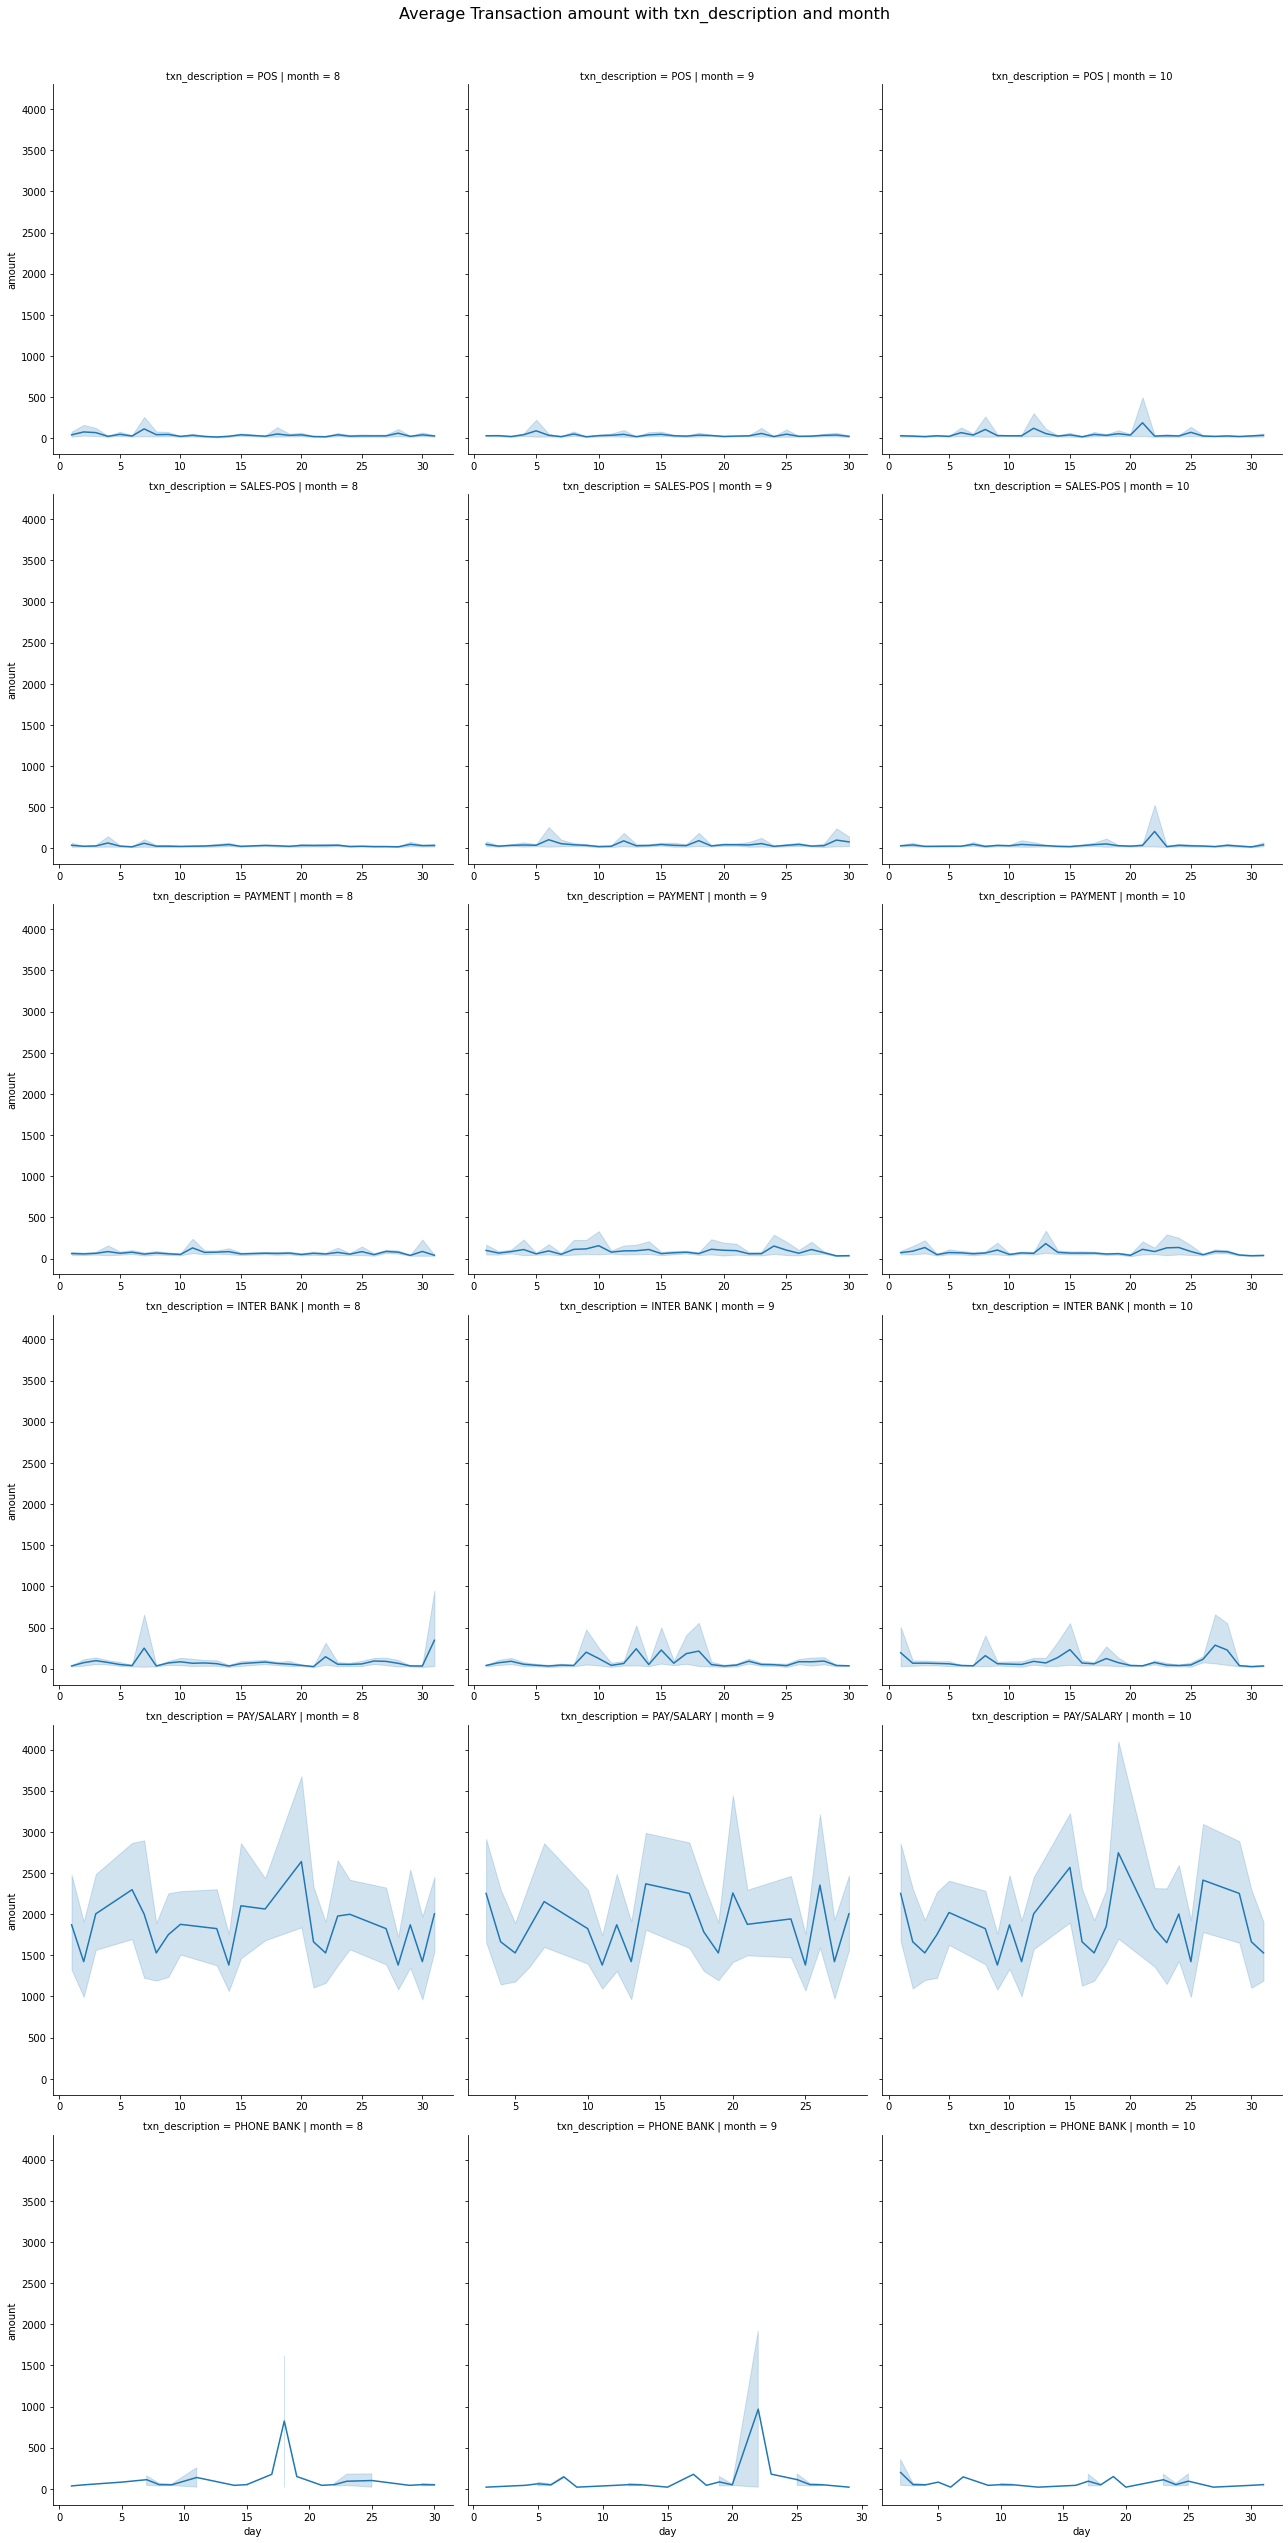

In [167]:
s = sns.FacetGrid(df_time,size=6,row='txn_description',col='month',sharex=False)
s.map(sns.lineplot,'day','amount')
s.fig.subplots_adjust(top=0.95)
s.fig.suptitle('Average Transaction amount with txn_description and month', fontsize=16)
plt.show()

We see that <b>all except PAY/SALARY</b> have average values tending towards the 0-500 AUD range. The main contributor of the total transaction amount is `PAY/SALARY`. The `PHONE BANK` costs have also undergone a spike during <b>15-20th for the month of August as well as 20-25th for the month of September.</b>
    
There are similar small spikes in transaction amounts for `Sales POS` as well as `POS`

<h2>Final keynotes</h2>

Through this complete pipeline of data analysis we were able to pin-point and understand a variety of different aspects of the dataset. We noted down many observations and understood the data better such as:

<ol>
    <li>The main transaction type that amounts to the most transaction amount</li>
    <li>The main region of transactions as well as the main source of transactions</li>
    <li>The most popular age ranges for these transactions</li>
</ol>

We were able to successfully extract key-insights from the data and present it in a simple understandable format to present to further people.